# Defining the problem statement
The data contains anonymous information such as age, occupation, education, working class, etc. 
The goal is to train a binary classifier to predict the salary which has two possible values ‘>50K’ and ‘<50K’. 
There are 48842 instances and 14 attributes in the dataset.
The data contains a good blend of categorical, numerical and missing values.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset
df = pd.read_csv('C:/Users/user/Downloads/Adult.csv')
df.head()#to display some of the starting records

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# Descriptive Statistics


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 13 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
hours-per-week    30162 non-null int64
native-country    30162 non-null object
salary            30162 non-null object
dtypes: int64(4), object(9)
memory usage: 3.0+ MB


In [5]:
df.shape


(30162, 13)

In [6]:
df.describe()

,age,fnlwgt,education-num,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,40.931238
std,13.134665,1.056530e+05,2.549995,11.979984
min,17.000000,1.376900e+04,1.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


In [7]:
df.workclass.value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [9]:
df.education.value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [10]:
df["marital-status"].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [11]:
df.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales-Bussiness      3584
Other-service        3212
MachineInsp-Op       1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Servernt-Service      143
Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [13]:
def fun_view():
    ''' This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.'''
    null_values = df.apply(lambda x:x.isnull().sum())
    blank_char = df.apply(lambda x:x.isin(['?']).sum())
    percent_blank_char = df.apply(lambda x:round((x.isin(['?']).sum()/df.shape[0])*100, 2))
    unique_values = df.apply(lambda x:len(x.unique()))
    return pd.DataFrame({'null_values':null_values,
                         '? Values':blank_char,'% ? Values':percent_blank_char
                        ,'unique_values':unique_values})

In [14]:
%%time
print('Function Information',fun_view.__doc__)
view = fun_view()
display(view)

Function Information  This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.


,null_values,? Values,% ? Values,unique_values
age,0,0,0.0,72
workclass,0,0,0.0,7
fnlwgt,0,0,0.0,20263
education,0,0,0.0,16
education-num,0,0,0.0,16
marital-status,0,0,0.0,7
occupation,0,0,0.0,14
relationship,0,0,0.0,6
race,0,0,0.0,5
sex,0,0,0.0,2


Wall time: 469 ms


In [15]:
# Overall null values in the dataset. 
view[view['% ? Values'] != 0]

,null_values,? Values,% ? Values,unique_values



The columns workClass, occupation, native-country have missing values

# Numerical and categorical data:

# numeric (ways of finding numeric )

df._get_numeric_data()------------

df.select_dtypes(include=[np.number])----------

df.select_dtypes(include=np.number).columns.tolist()-----------------------you want the names of numeric columns:

df.select_dtypes(exclude=['object'])----------------------------------

numeric_clmns = df.dtypes[df.dtypes != "object"].index---------------------

df.select_dtypes('number').columns---------------------------

In [16]:
numeric=df.select_dtypes(include=[np.number]) #numeric 

In [17]:
print(numeric.columns)

Index(['age', 'fnlwgt', 'education-num', 'hours-per-week'], dtype='object')


In [18]:
numeric.isnull().sum()

age               0
fnlwgt            0
education-num     0
hours-per-week    0
dtype: int64

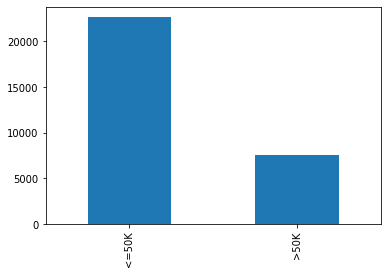

In [19]:
df.salary.value_counts().plot(kind='bar') #target variable

In [20]:
df.salary.value_counts()

<=50K    22654
>50K      7508
Name: salary, dtype: int64

In [21]:
categorical = df.select_dtypes(include=['object'])
print(categorical.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')


In [22]:
categorical.isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
salary            0
dtype: int64

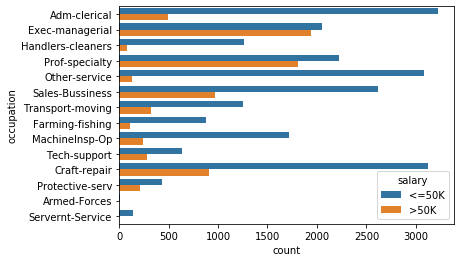

In [23]:
sns.countplot(y='occupation', hue='salary', data=df,)

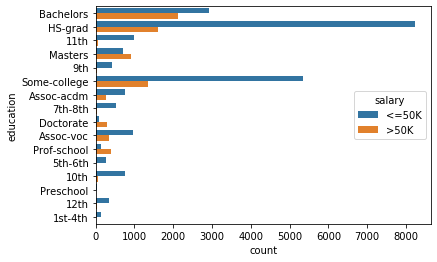

In [24]:
sns.countplot(y='education', hue='salary', data=df,)

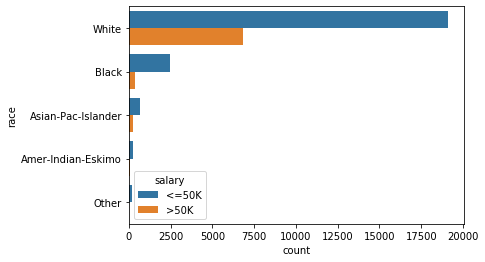

In [25]:
sns.countplot(y='race', hue='salary', data=df,)

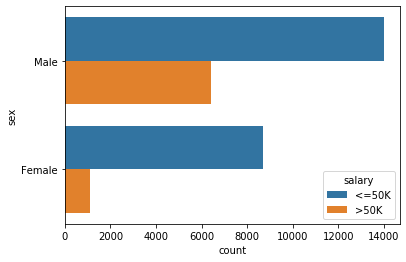

In [26]:
sns.countplot(y='sex', hue='salary', data=df,)

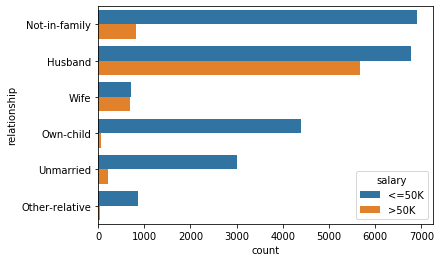

In [27]:
sns.countplot(y='relationship', hue='salary', data=df,)

In [28]:
#checking duplicates

df.duplicated().sum()

25

In [29]:
df= df.drop_duplicates(keep = 'first')
df.shape

(30137, 13)

In [30]:
df1=df.copy()

In [31]:
# Quick known cleanup for this dataset
df['workclass']=df['workclass'].replace('?','Unknown') # Treat ? workclass as unknown
df = df[df['occupation'] != '?'] # Remove rows with occupation =?# Dropping occupation is '?' 
df['native-country']=df['native-country'].replace('?', df['native-country'].mode()[0]) # Replace ? with mode
df['fnlwgt']=np.log(df['fnlwgt']) # Convert to antural log
df.loc[df['native-country']!='United-States','native-country'] = 'non_usa'
# Two many category level, convert just US and Non-US

In [32]:
df['occupation'].value_counts()

Prof-specialty       4034
Craft-repair         4025
Exec-managerial      3991
Adm-clerical         3719
Sales-Bussiness      3584
Other-service        3208
MachineInsp-Op       1963
Transport-moving     1572
Handlers-cleaners    1349
Farming-fishing       987
Tech-support          911
Protective-serv       644
Servernt-Service      141
Armed-Forces            9
Name: occupation, dtype: int64

In [33]:
df.workclass.value_counts()

Private             22262
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [34]:
print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())

The maximum age is 90
The minimum age is 17


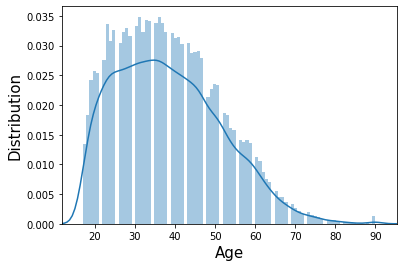

In [35]:
sns.distplot(df['age'], bins = 90)
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)


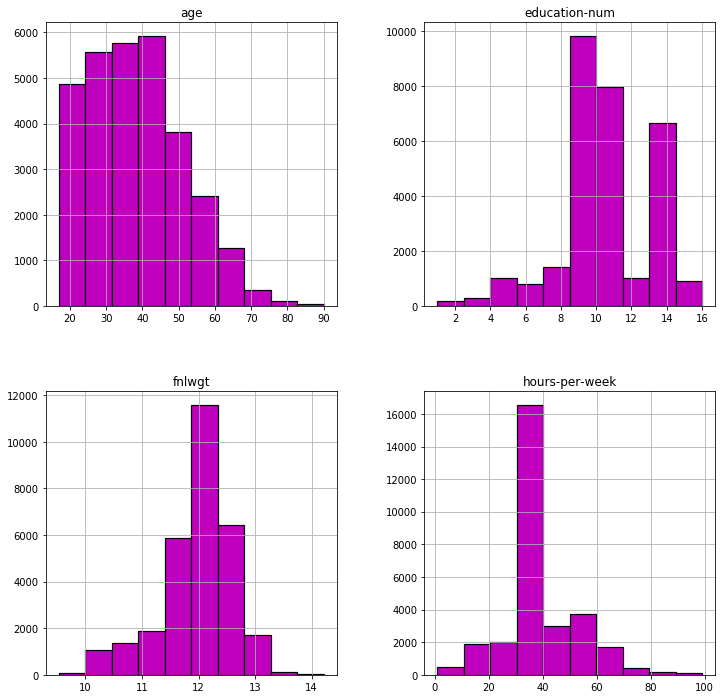

In [36]:
# Distribution of Different Features of the Dataset
dist = df.hist(edgecolor = 'black', linewidth = 1.2, color = 'm')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# checking correlation

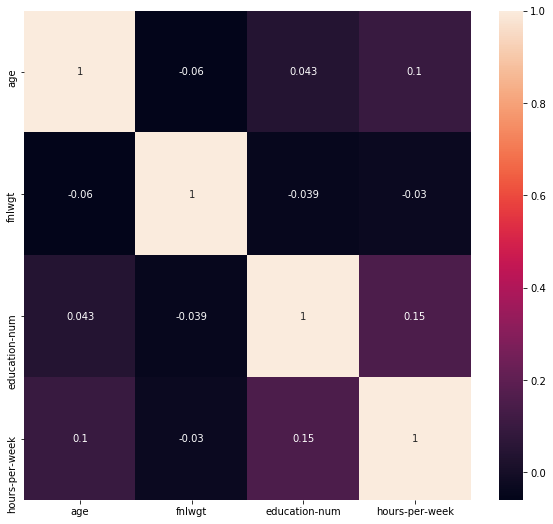

In [37]:
plt.rcParams['figure.figsize'] = [10,9]
sns.heatmap(df.corr(), annot = True);

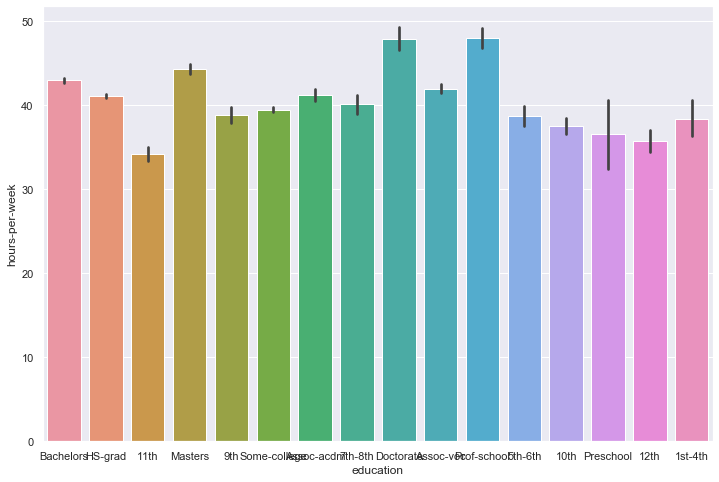

In [38]:
#hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
a = sns.barplot(x = df['education'], y = df['hours-per-week'], data = df)

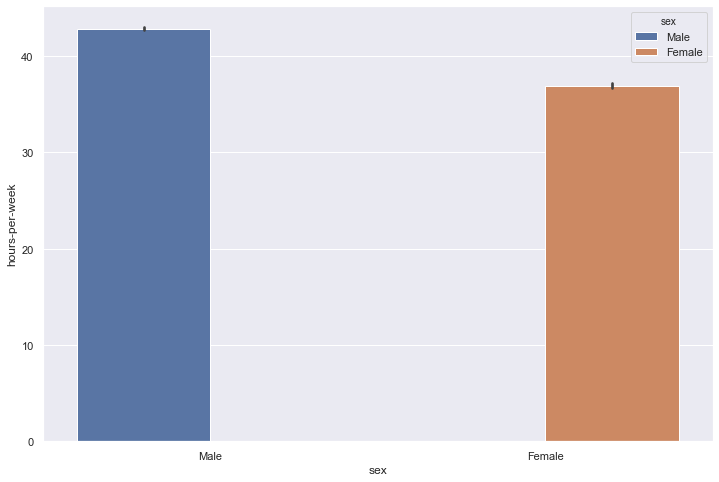

In [39]:
a = sns.barplot(x = df['sex'], y = df['hours-per-week'], data = df,hue = 'sex')

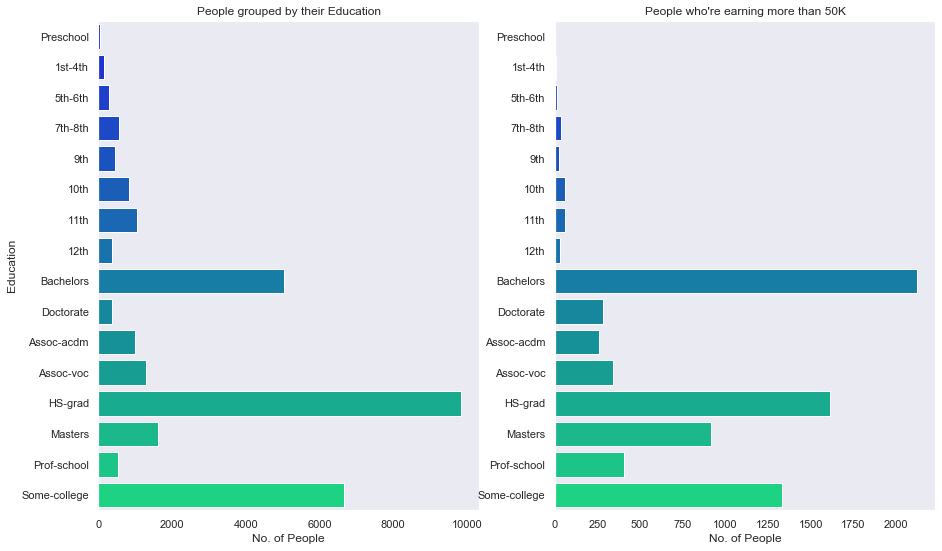

In [40]:
# Grouping people by their education
education_size = df.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_salary = df.loc[df['salary'] == '>50K', ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People who're earning more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_salary), y = list(more_salary.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[1])

#plt.setp(sns_ed_1.get_xticklabels(), rotation = 90);
#plt.setp(sns_ed_2.get_xticklabels(), rotation = 90);

In [41]:
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales-Bussiness',
       'Transport-moving', 'Farming-fishing', 'MachineInsp-Op',
       'Tech-support', 'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Servernt-Service'], dtype=object)

In [42]:
# Grouping people according to their country and their salary
df = df[df['native-country'] != '?']
native_more = df.loc[df['salary'] == '>50K',['native-country']].groupby('native-country').size()
native_less = df.loc[df['salary'] == '<=50K',['native-country']].groupby('native-country').size()

index_more = list(native_more.index)
index_less = list(native_less.index)

# Checking if the Countries in both aspects are same or not
print(index_more)
print(len(index_more))
print(index_less)
print(len(index_less))

['United-States', 'non_usa']
2
['United-States', 'non_usa']
2


In [43]:
# Checking which Countries are not in the list
[country for country in index_less if country not in index_more]

[]

In [44]:
# Making DataFrames of the Data
df_more = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })

# Adding the entries of the missing countries
df_more.loc[40] = 'Holand-Netherlands', 0
df_more.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

df_more

,Countries,>50K
0,United-States,6993
1,non_usa,513
40,Holand-Netherlands,0
41,Outlying-US(Guam-USVI-etc),0


In [45]:
# Merging both the Data Frames to be used for plotting
df_fin = pd.merge(df_less, df_more, on = 'Countries')

df_fin

,Countries,<=50K,>50K
0,United-States,20492,6993
1,non_usa,2139,513


In [46]:
df1=df.copy()

In [47]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,11.330336,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,12.281393,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,12.366153,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,12.732011,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,non_usa,<=50K


In [48]:
#Changing the salary column into Numerical Value
df1['salary'] = df1['salary'].map({'<=50K':0, '>50K':1})

In [49]:
df1['salary'].value_counts()

0    22631
1     7506
Name: salary, dtype: int64

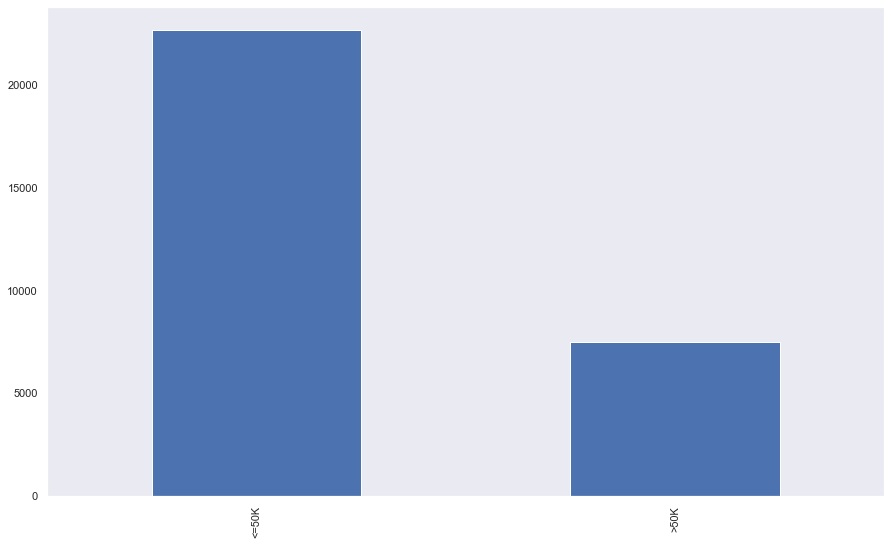

In [50]:
df.salary.value_counts().plot(kind='bar')

# #Changing the Categorical Values to Numerical values using the Label Encoder

In [51]:
categorical.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [52]:
# We will use Label encoder for all categorical variables
from sklearn import preprocessing
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
categorical = categorical.apply(le.fit_transform)
categorical.head()

# concat df_categorical with original df
df = df.drop(categorical.columns, axis=1)
df = pd.concat([df,categorical], axis=1)

In [53]:
df2=df.copy()

# Scale the numerical features using StandardScalar

In [54]:
# Scale the numerical features using StandardScalar
from sklearn.preprocessing import StandardScaler
numeric= ['age','fnlwgt','education-num','hours-per-week']
scaler = StandardScaler()

df[numeric] = scaler.fit_transform(
df[numeric])

In [55]:
df.head()

,age,fnlwgt,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,0.042443,-1.150512,1.128946,-0.078106,5,9,4,0,1,4,1,38,0
1,0.880150,-1.036188,1.128946,-2.332222,4,9,2,3,0,4,1,38,0
2,-0.033712,0.471915,-0.440437,-0.078106,2,11,0,5,1,4,1,38,0
3,1.108616,0.606319,-1.225128,-0.078106,2,1,2,5,0,2,1,38,0
4,-0.795264,1.186464,1.128946,-0.078106,2,9,2,8,5,2,0,4,0


In [56]:
df.isna().sum() 
#check nan values

age               25
fnlwgt            25
education-num     25
hours-per-week    25
workclass          0
education          0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
native-country     0
salary             0
dtype: int64

In [57]:
df.dropna(inplace=True)
#drop nan values

In [58]:
df2=df.copy()

# Splitting the data set into train and test set

In [59]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['salary', 'education-num'])
y= df['salary']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state = 0)



In [60]:
print ("Train data set size : ", x_train.shape)
print ("Test data set size : ", x_test.shape)

Train data set size :  (21095, 11)
Test data set size :  (9042, 11)


# Feature importance:

In [61]:
pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.


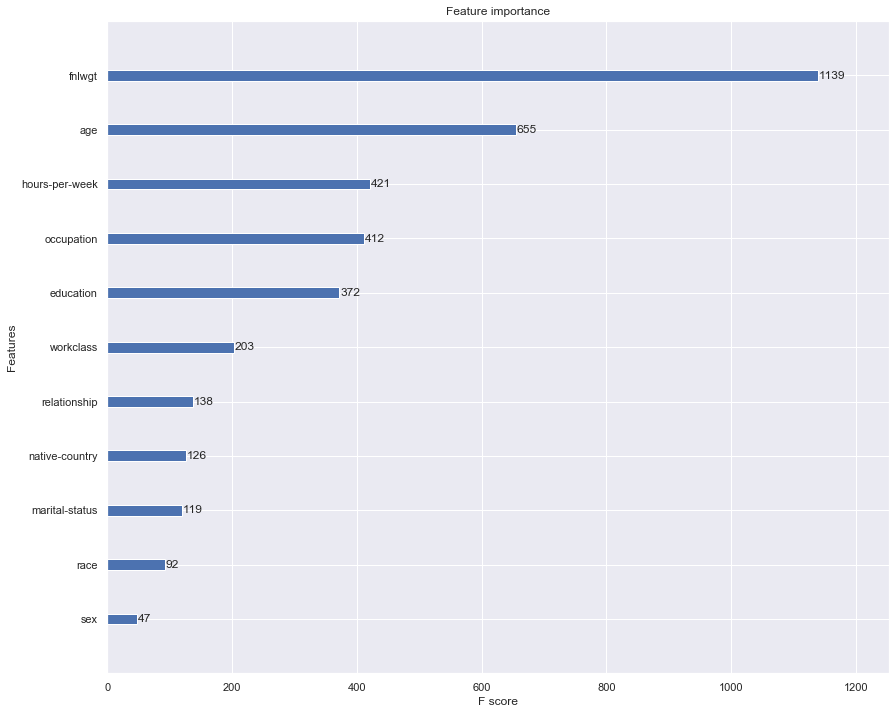

In [62]:

from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(x_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

# select k best

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings; warnings.simplefilter('ignore')

# Logistic 

In [64]:
log = LogisticRegression(C = 0.5, max_iter = 500)
log_model = log.fit(x_train, y_train)

# Predict
pred_1 = log_model.predict(x_test)

print ("The accuracy of log_model: ",accuracy_score(y_test, pred_1))
print ("The f1 score of log_model: ", f1_score(y_test, pred_1, average = 'binary'))

The accuracy of log_model:  0.7568015925680159
The f1 score of log_model:  0.3030110935023772


# Random Forest

In [65]:
rf = RandomForestClassifier(n_estimators = 200)
rf_model = rf.fit(x_train, y_train)

# Predict
pred_2 = rf_model.predict(x_test)

print ("The accuracy of rf_model : ",accuracy_score(y_test, pred_2))
print ("The f1 score of rf_model: ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of rf_model :  0.82304799823048
The f1 score of rf_model:  0.6144578313253013


In [66]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,matthews_corrcoef,roc_auc_score

In [67]:
def fun_model(models,x_train, x_test, y_train, y_test):
    col = []; train_score = []; acc = []; kappa=[]; roc = []; prc=[];rec=[];f1=[]
    for i, j in models:
        pred = j.fit(x_train,y_train).predict(x_test)
        col.append(i)
        train_score.append(j.score(x_train,y_train))
        acc.append(accuracy_score(y_test,pred))
        prc.append(precision_score(y_test,pred))
        rec.append(recall_score(y_test,pred))
        f1.append(f1_score(y_test,pred))
        kappa.append(cohen_kappa_score(y_test,pred))
        roc.append(roc_auc_score(y_test,pred))

    return pd.DataFrame({'Model Name':col,
                  'Accuracy on Train set ':train_score,
                  'Accuracy on Test set ':acc,
                         'f1_score':f1,
                    'Cohen Kappa Score':kappa
                    ,})

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.7,random_state=1)
models = [] 
models.append(('Logistic Regression', LogisticRegression(random_state=1)))  
models.append(('Logistic Regression Balanced', LogisticRegression(random_state=1,class_weight='balanced')))
fun_model(models,x_train, x_test, y_train, y_test)

,Model Name,Accuracy on Train set,Accuracy on Test set,f1_score,Cohen Kappa Score
0,Logistic Regression,0.758568,0.758350,0.298105,0.188899
1,Logistic Regression Balanced,0.684285,0.678832,0.543683,0.325152


# balancing target variable

Wall time: 2.08 s


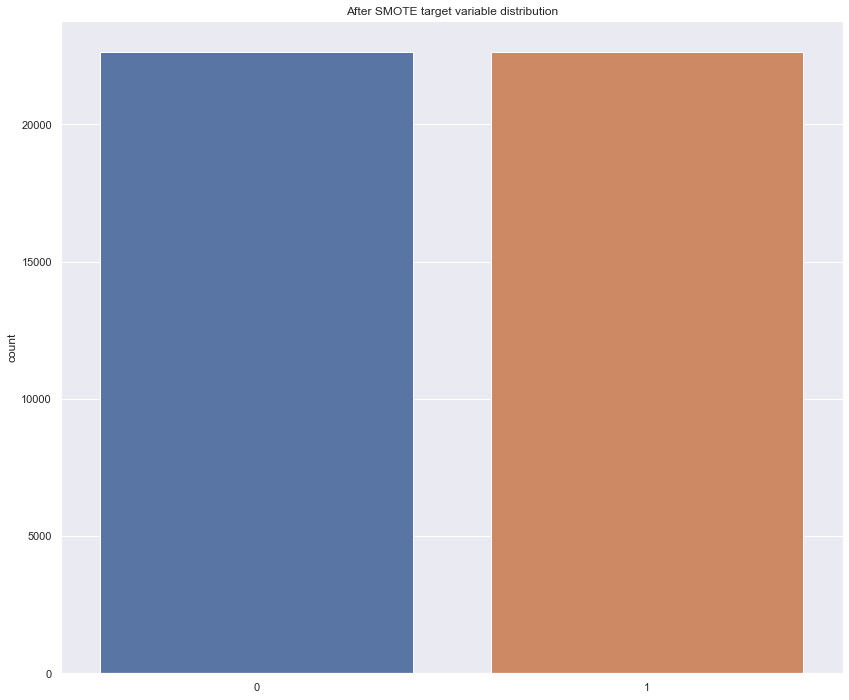

In [69]:
%%time
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)
X_res = pd.DataFrame(X_res,columns=x.columns)
sns.countplot(y_res).set_title('After SMOTE target variable distribution')
plt.savefig('After SMOTE target variable distribution.png')
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_res,y_res,train_size=.7,random_state=1)

# RandomForest

In [70]:
rf = RandomForestClassifier(n_estimators = 200)
rf_model1 = rf.fit(x_train1, y_train1)

# Predict
pred_smote = rf_model.predict(x_test1)

print ("The accuracy of rf_model : ",accuracy_score(y_test1, pred_smote))
print ("The f1 score of rf_model: ", f1_score(y_test1, pred_smote, average = 'binary'))

The accuracy of rf_model :  0.8901244568819501
The f1 score of rf_model:  0.8803528468323977


In [71]:
print(classification_report(y_test1, pred_smote))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      6769
           1       0.97      0.81      0.88      6810

    accuracy                           0.89     13579
   macro avg       0.90      0.89      0.89     13579
weighted avg       0.90      0.89      0.89     13579



# xgboost

In [72]:
from xgboost.sklearn import XGBClassifier

In [73]:
xgb= XGBClassifier()
xg_model =xgb.fit(x_train1, y_train1)

# Predict
pred_xgb = xg_model.predict(x_test1)

print ("The accuracy of xgb_model : ",accuracy_score(y_test1, pred_xgb))
print ("The f1 score of xgb_model: ", f1_score(y_test1, pred_xgb, average = 'binary'))

The accuracy of xgb_model :  0.883717504970911
The f1 score of xgb_model:  0.8846856057839771


In [74]:
print(classification_report(y_test1, pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      6769
           1       0.88      0.89      0.88      6810

    accuracy                           0.88     13579
   macro avg       0.88      0.88      0.88     13579
weighted avg       0.88      0.88      0.88     13579



# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model =dt.fit(x_train1, y_train1)

# Predict
pred_dt = dt_model.predict(x_test1)

print ("The accuracy of dt_model : ",accuracy_score(y_test1, pred_dt))
print ("The f1 score of dt_model: ", f1_score(y_test1, pred_dt, average = 'binary'))

The accuracy of dt_model :  0.8229619265041609
The f1 score of dt_model:  0.8238053356786866


In [76]:
print(classification_report(y_test1, pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      6769
           1       0.82      0.83      0.82      6810

    accuracy                           0.82     13579
   macro avg       0.82      0.82      0.82     13579
weighted avg       0.82      0.82      0.82     13579



# adaboost

In [77]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
pred_adab=adab.fit(x_train1, y_train1).predict(x_test1)

In [78]:
print ("The accuracy of ada_model : ",accuracy_score(y_test1, pred_adab))
print ("The f1 score of ada_model: ", f1_score(y_test1, pred_adab, average = 'binary'))

The accuracy of ada_model :  0.8349657559466824
The f1 score of ada_model:  0.841479804767631


# GridSearchCV and hyperparameter tunning

In [79]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [80]:
%%time
rfc = RandomForestClassifier(random_state=1)
param = {'n_estimators': [10, 15], 'max_features': [5, 10], 
 'max_depth': [5,7,8, None], 'bootstrap': [True, False]}

clf = GridSearchCV(rfc,param,scoring='accuracy',refit=True,cv=10)
clf.fit(x_train1,y_train1)
print('Completed')
print(clf.best_params_)

Completed
{'bootstrap': False, 'max_depth': None, 'max_features': 5, 'n_estimators': 15}
Wall time: 4min 50s


In [81]:
rf2 = RandomForestClassifier(bootstrap=False, criterion='gini',
                       max_depth=None , max_features=5,
                       min_samples_leaf=1, min_samples_split=2,n_estimators=15)
rf_model2 = rf2.fit(x_train1, y_train1)

# Predict
pred_smote2 = rf_model2.predict(x_test1)

print ("The accuracy of rf_model : ",accuracy_score(y_test1, pred_smote2))
print ("The f1 score of rf_model: ", f1_score(y_test1, pred_smote2, average = 'binary'))

The accuracy of rf_model :  0.8683260917593343
The f1 score of rf_model:  0.8695652173913043


In [82]:
from xgboost.sklearn import XGBClassifier
xgb2= XGBClassifier(base_score=0.5, booster='gbtree', 
              learning_rate=0.4, max_depth=3, n_estimators=100,objective='binary:logistic', random_state=0, seed=None)
xg_model2 =xgb2.fit(x_train1, y_train1)

# Predict
pred_xgb2 = xg_model2.predict(x_test1)

print ("The accuracy of xgb_model2 : ",accuracy_score(y_test1, pred_xgb2))
print ("The f1 score of xgb_model2: ", f1_score(y_test1, pred_xgb2, average = 'binary'))

The accuracy of xgb_model2 :  0.878857058693571
The f1 score of xgb_model2:  0.8812874359529478
